<a href="https://colab.research.google.com/github/Amandaheloise/HTML_Basico/blob/main/Projeto_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(4052024001545_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Amanda Heloise da Silva
**Matrícula:** 4052024001545

**Dataset:** [Preços de Casa Por Moradia](https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression/data)

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

# Descrição do Problema

O mercado Imobiliário possui uma grande variedade de preços, gostos de tamanhos de casas e tipos.Devido a isso, saber se o preço de uma casa é justo ao que ela oferece é uma forma de economizar o dinheiro e não acabar adquirindo uma casa supervalorizada.

###Descrição do dataset:
O Dataset é  um conjunto de dados multivariado composto por atributos de propriedades imobiliárias como Ano em que foi contruído, número de quartos e banheiros, número de andares se tem garagem piscina ou jardim. Esses atributos descrevem com detalhes o imovel, na hora da aquisição ou em vistorias de precisificação do imovel para definição de impostos são essas caracteristicas que o cliente leva em consideração para tomada de decisão.


## Hipóteses do Problema

As hipóteses para o Dataset são as seguintes:
*    O preço de uma habitação tem está diretamente relacionado a uma variavel? Ou mais de uma?
*    Existe alguma correlação entre Preço maior e presença de piscina na casa?
*    As casas de menores preços são as que possuem menos quartos?
*    As casas com mais banheiros são as mais caras?

Restrição: Os dados utilizados para treinar o modelo foram obtidos a partir do Kaggle não sendo informado ano de aquisição e periodo, podendo insidir fatores como alta e baixas do mercado imobiliário.



## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (Ano de construção,número de quartos, banheiros e andares e se tem ou não garamgem ou piscina), o objetivo é prever o preço do imovel e verificar qual variavel tem maior correlação com valor da casa.

## Seleção de Dados

Os dados foram obitidos atravez da plataforma Kaggle com nome de Regressão dos preços da habitação.
Segue link do documento. https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression/data

O dataset selecionado possui uma grande variedade de caracteristicas de uma residência e ele foi escolhido devido a importancia do tema mesmo na atualidade.
Poder prever o valor de uma casa pelas suas caracteristicas é de grande valia no mercado imobiliário tanto para o cliente que pode encontrar oportunidades, como também para fiscalizações verificarem se não há nenhuma infração na coleta de impostos.

## Atributos do Dataset

o Dataset possui os seguintes atributos:

*   ID : Um identificador exclusivo para cada propriedade.
*   Square_Feet : A área da propriedade em metros quadrados.
* Num_Bedrooms : O número de quartos na propriedade.
* Num_Bathrooms : O número de banheiros na propriedade.
* Num_Floors : O número de andares da propriedade.
* Ano_Construído : O ano em que a propriedade foi construída.
* Has_Garden : Indica se a propriedade tem um jardim (1 para sim, 0 para não).
* Has_Pool : indica se a propriedade tem um pool (1 para sim, 0 para não).
* Garage_Size : O tamanho da garagem em metros quadrados.
* Location_Score : Uma pontuação de 0 a 10 que indica a qualidade do bairro (pontuações mais altas indicam bairros melhores).
* Distance_to_Center : A distância da propriedade até o centro da cidade em quilômetros.
* Preço : A variável alvo que representa o preço da propriedade. Este é o valor que pretendemos prever.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [ ]:

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários para problemas de regressão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Amandaheloise/MVP-Machine-Learning/refs/heads/main/real_estate_dataset.csv"
# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')
# Mostra as primeiras linhas do dataset
dataset.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset possui 500 instâncias (observações) separados em 12 Caracteristicas, 4 do tipo Float e 8 do tipo Inteiro e não possui nenhum valor nulo.

In [ ]:
print(f"Total de instâncias: {len(dataset)}")
print("\nTipos de dados por coluna:")
print(dataset.info())

Total de instâncias: 500

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB
None


In [ ]:
dataset.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


## Estatísticas Descritivas


Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
dataset.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
media_dataset = dataset.mean()
media_dataset=media_dataset.round(0)
print(media_dataset)


ID                       250.0
Square_Feet              175.0
Num_Bedrooms               3.0
Num_Bathrooms              2.0
Num_Floors                 2.0
Year_Built              1958.0
Has_Garden                 1.0
Has_Pool                   0.0
Garage_Size               30.0
Location_Score             5.0
Distance_to_Center        10.0
Price                 582210.0
dtype: float64


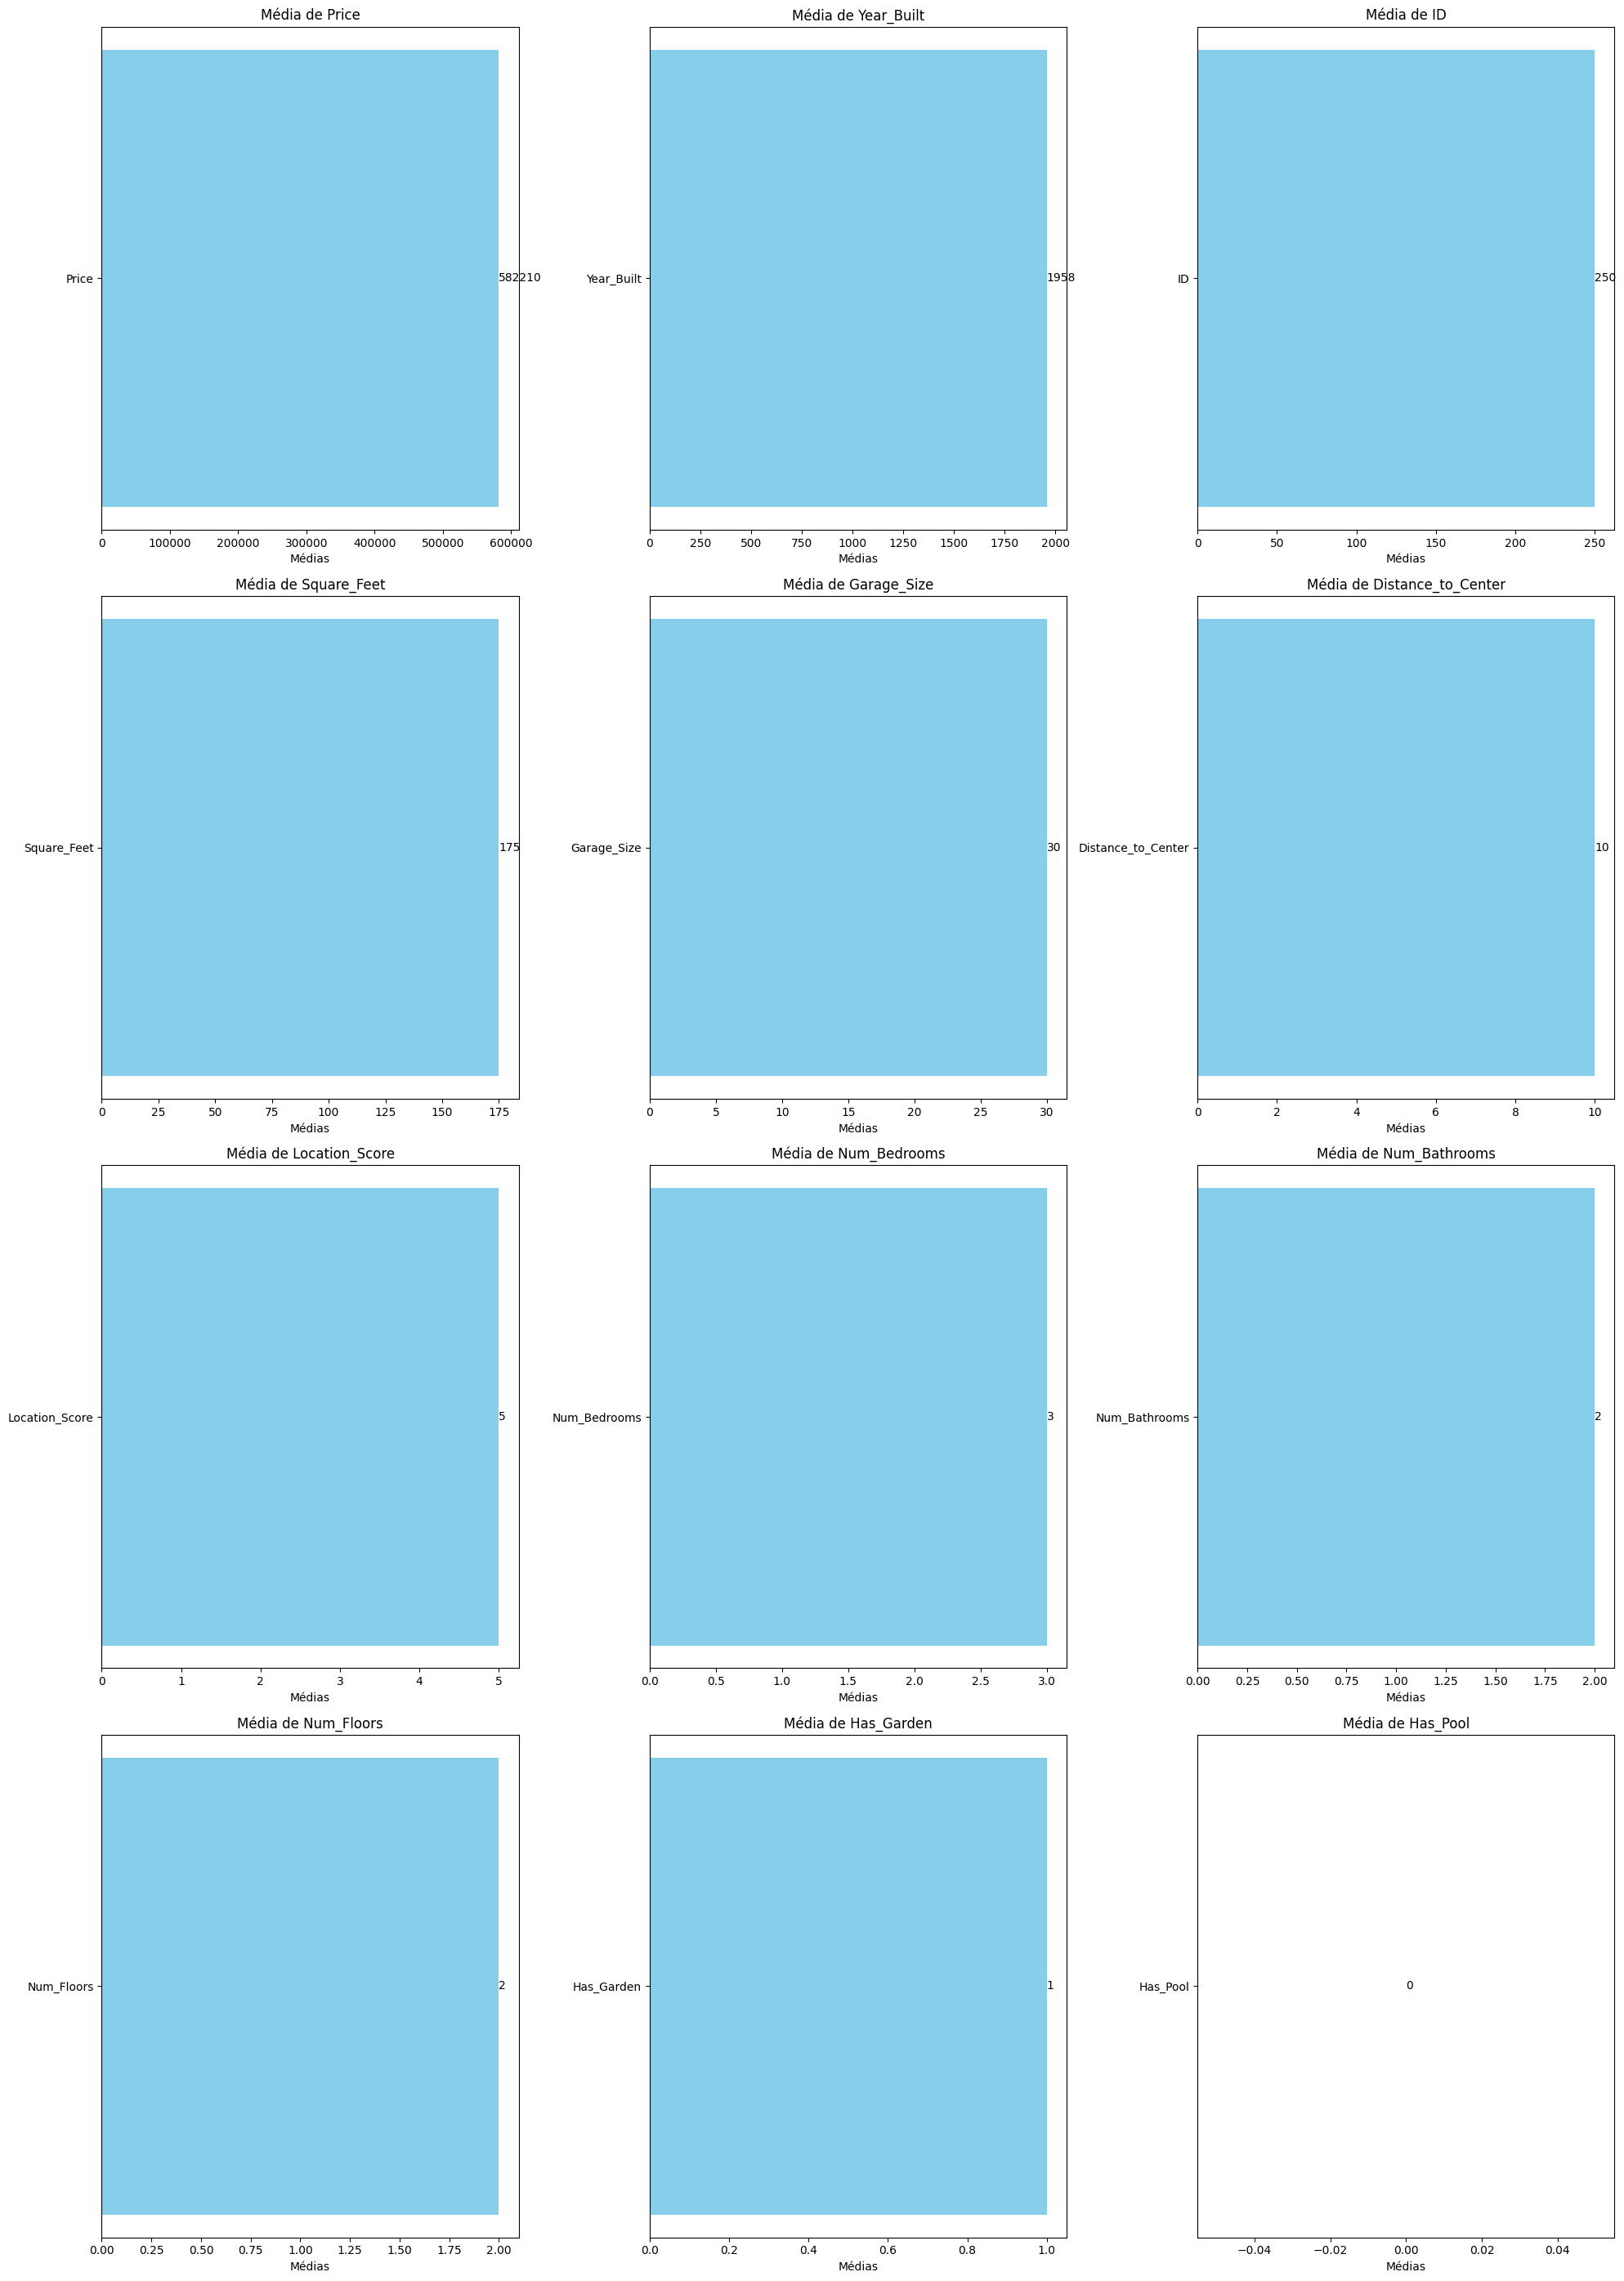

In [ ]:


# Dividindo o gráfico de barras das médias do dataset em pequenos gráficos de barras múltiplos
num_vars = len(media_dataset)
num_cols = 3  # Número de colunas para os subplots
num_rows = (num_vars + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 7))

# Plotando cada variável em um subplot separado
for i, (var, media) in enumerate(media_dataset.sort_values(ascending=False).items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.barh(var, media, color='skyblue')
    ax.set_title(f'Média de {var}')
    ax.set_xlabel('Médias')
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

# Removendo subplots vazios
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()



###Mediana
A mediana é o valor que separa a metade superior da metade inferior de um conjunto de dados ele é usada principalmente quando se há valores extremos que podem distorcer a média.

In [ ]:
#Calculo da mediana do dataset
mediana_dataset = dataset.median()
mediana_dataset=mediana_dataset.round(0)
print(mediana_dataset)

ID                       250.0
Square_Feet              178.0
Num_Bedrooms               3.0
Num_Bathrooms              2.0
Num_Floors                 2.0
Year_Built              1959.0
Has_Garden                 1.0
Has_Pool                   0.0
Garage_Size               30.0
Location_Score             5.0
Distance_to_Center        11.0
Price                 574724.0
dtype: float64


###Moda
 A moda ajuda a entender a distribuição dos dados, revelando o valor que ocorre com mais frequência e pode ser mais representativo do conjunto, especialmente quando há muitos valores repetidos ou quando os dados não são numéricos.



In [ ]:
from statistics import mode
#Calculo da moda do dataset
moda_dataset = dataset.mode()
moda_dataset=moda_dataset.round(0)
print(moda_dataset)

      ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0      1         51.0           1.0            1.0         2.0      1920.0   
1      2         51.0           NaN            NaN         NaN      1959.0   
2      3         52.0           NaN            NaN         NaN         NaN   
3      4         52.0           NaN            NaN         NaN         NaN   
4      5         53.0           NaN            NaN         NaN         NaN   
..   ...          ...           ...            ...         ...         ...   
495  496        297.0           NaN            NaN         NaN         NaN   
496  497        297.0           NaN            NaN         NaN         NaN   
497  498        298.0           NaN            NaN         NaN         NaN   
498  499        298.0           NaN            NaN         NaN         NaN   
499  500        298.0           NaN            NaN         NaN         NaN   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distanc

É possivel observar que tem atributos que possuem mais de uma moda indicando que esse atributo é multimodal.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
desvpd_dataset= dataset.std()
print(desvpd_dataset.round(0).apply(lambda x: f"{x:,.0f}"))

ID                        144
Square_Feet                75
Num_Bedrooms                1
Num_Bathrooms               1
Num_Floors                  1
Year_Built                 35
Has_Garden                  0
Has_Pool                    1
Garage_Size                12
Location_Score              3
Distance_to_Center          6
Price                 122,273
dtype: object


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

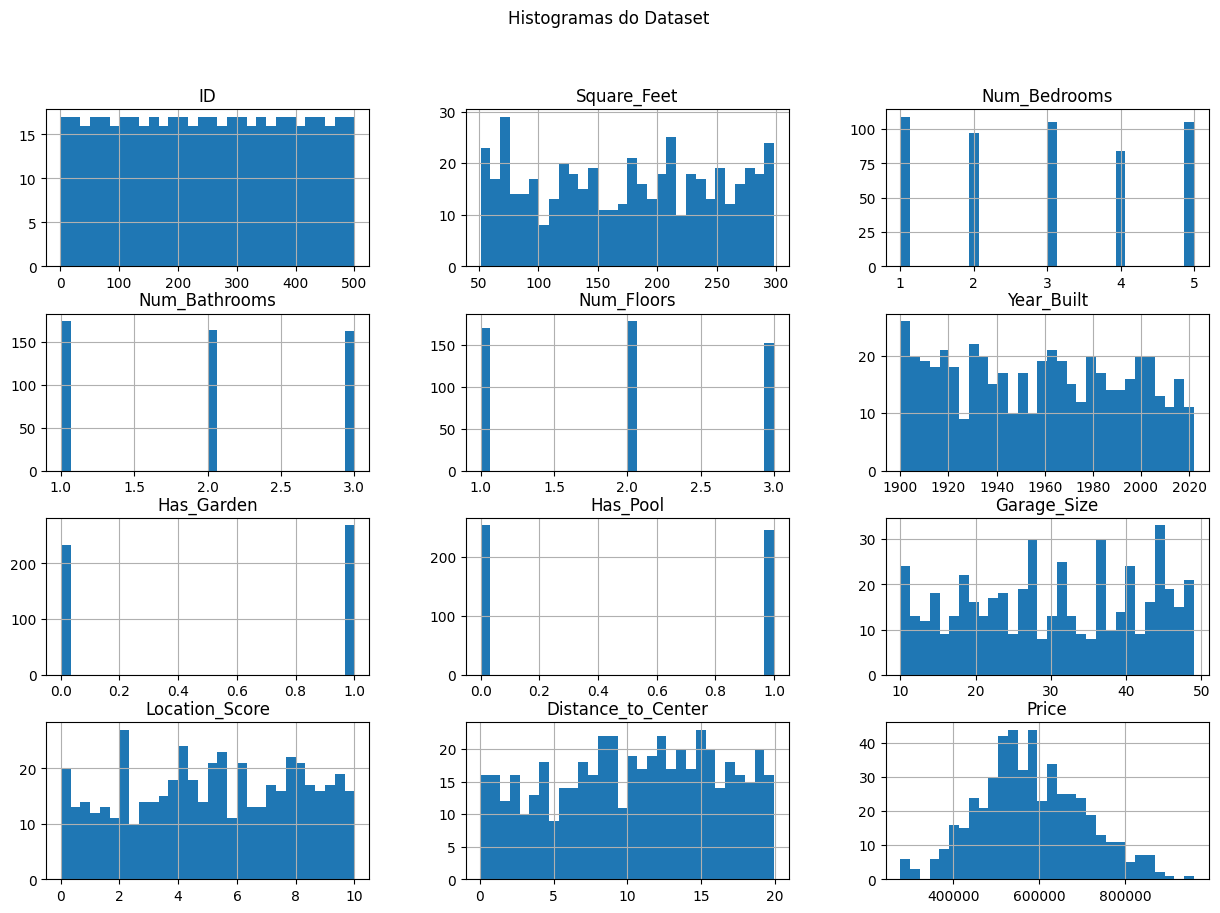

In [ ]:
# Plotar histograma
dataset.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramas do Dataset')
plt.show()

Observa-se que para os atributos Numero de quartos, número de banheiros, andares,presença ou não de jardim e piscina, são variaveis com pouca variação dos valores,mostrando que se tratam de  moradias com tamanhos médios com no máximo 5 quartos e 3 andares ou seja, não estamos tratando de grandes prédios habitacionais.

Analisando os gráficos é possivel observar que apenas o histograma do preço se comporta como um histograma multimodal pois há aparecimento de vários picos.
Os historamas dos atibutos número de banheiros, andares,presença ou não de jardim e piscina aparecem como colunas separadas, pois se tratam de variaveis categoricas. Para esses tipos de variaveis gráficos de barras representam melhor a distibuição.

Os atributos restantes mostram histogramas com barras mais achatadas podendo caracterizar histogramas do tipo Platô indicando que existem várias distribuições juntas e com  médias diferentes.

A seguir iremos observar os gráficos de Disperssão para verificar as relações entre pares de atributos.
Observar as relações entre os atibutos é importante, pois por se tratar de um dataset de regressão linear precisamos observar quais atributos podem influenciar mais na valorização de uma habitação. Essa observação é importante para iniciarmos os treinamentos dos modelos de machine learning.

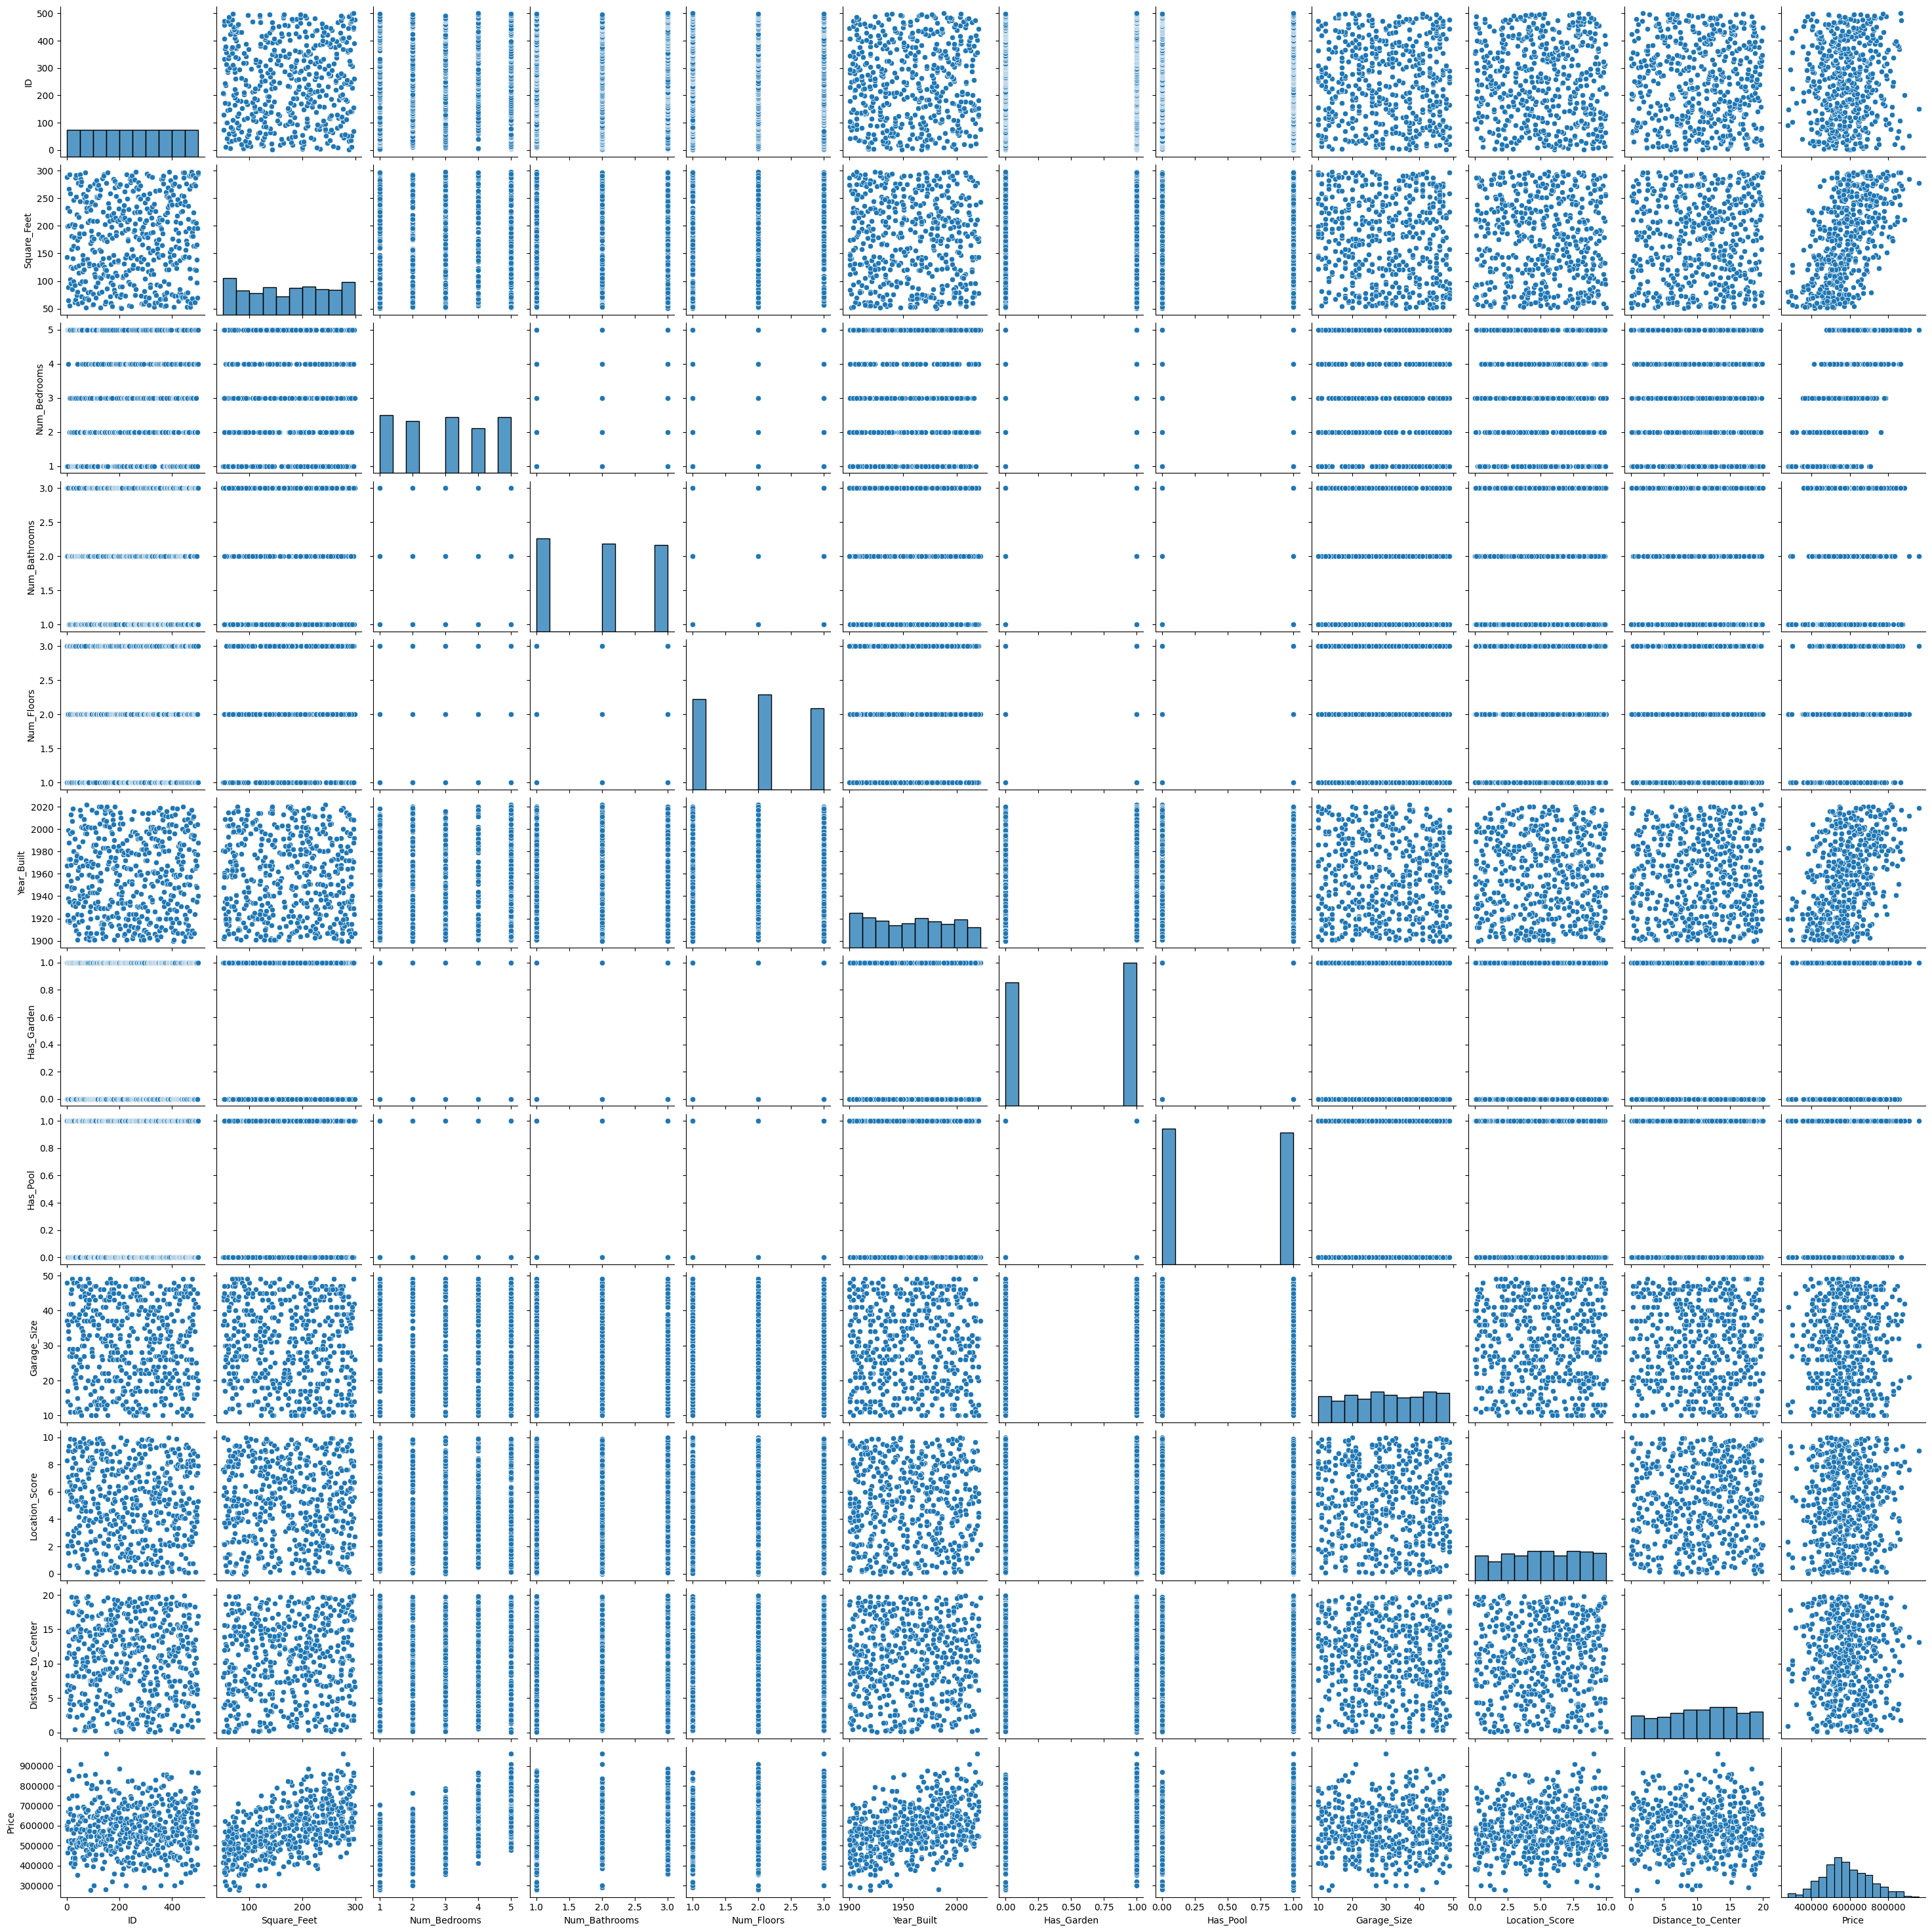

In [ ]:
# Parâmetros do gráfico de dispersão
sns.pairplot(dataset)
plt.show()

Analisando a matriz de dispersão, os gráficos que mostram a relação mais forte e linear São os de Numero de banheiros, quartos e número de andares. Estes gráficos apresentam uma forte correlação positiva, indicando que à medida que o valor do atributo aumenta, o preço também tende a aumentar de maneira consistente.

## Boxplot

Para entender melhor os atributos serão plotados seus boxplots, isso nos permite visualizar se existem valores que estão interferindo no resultados da média


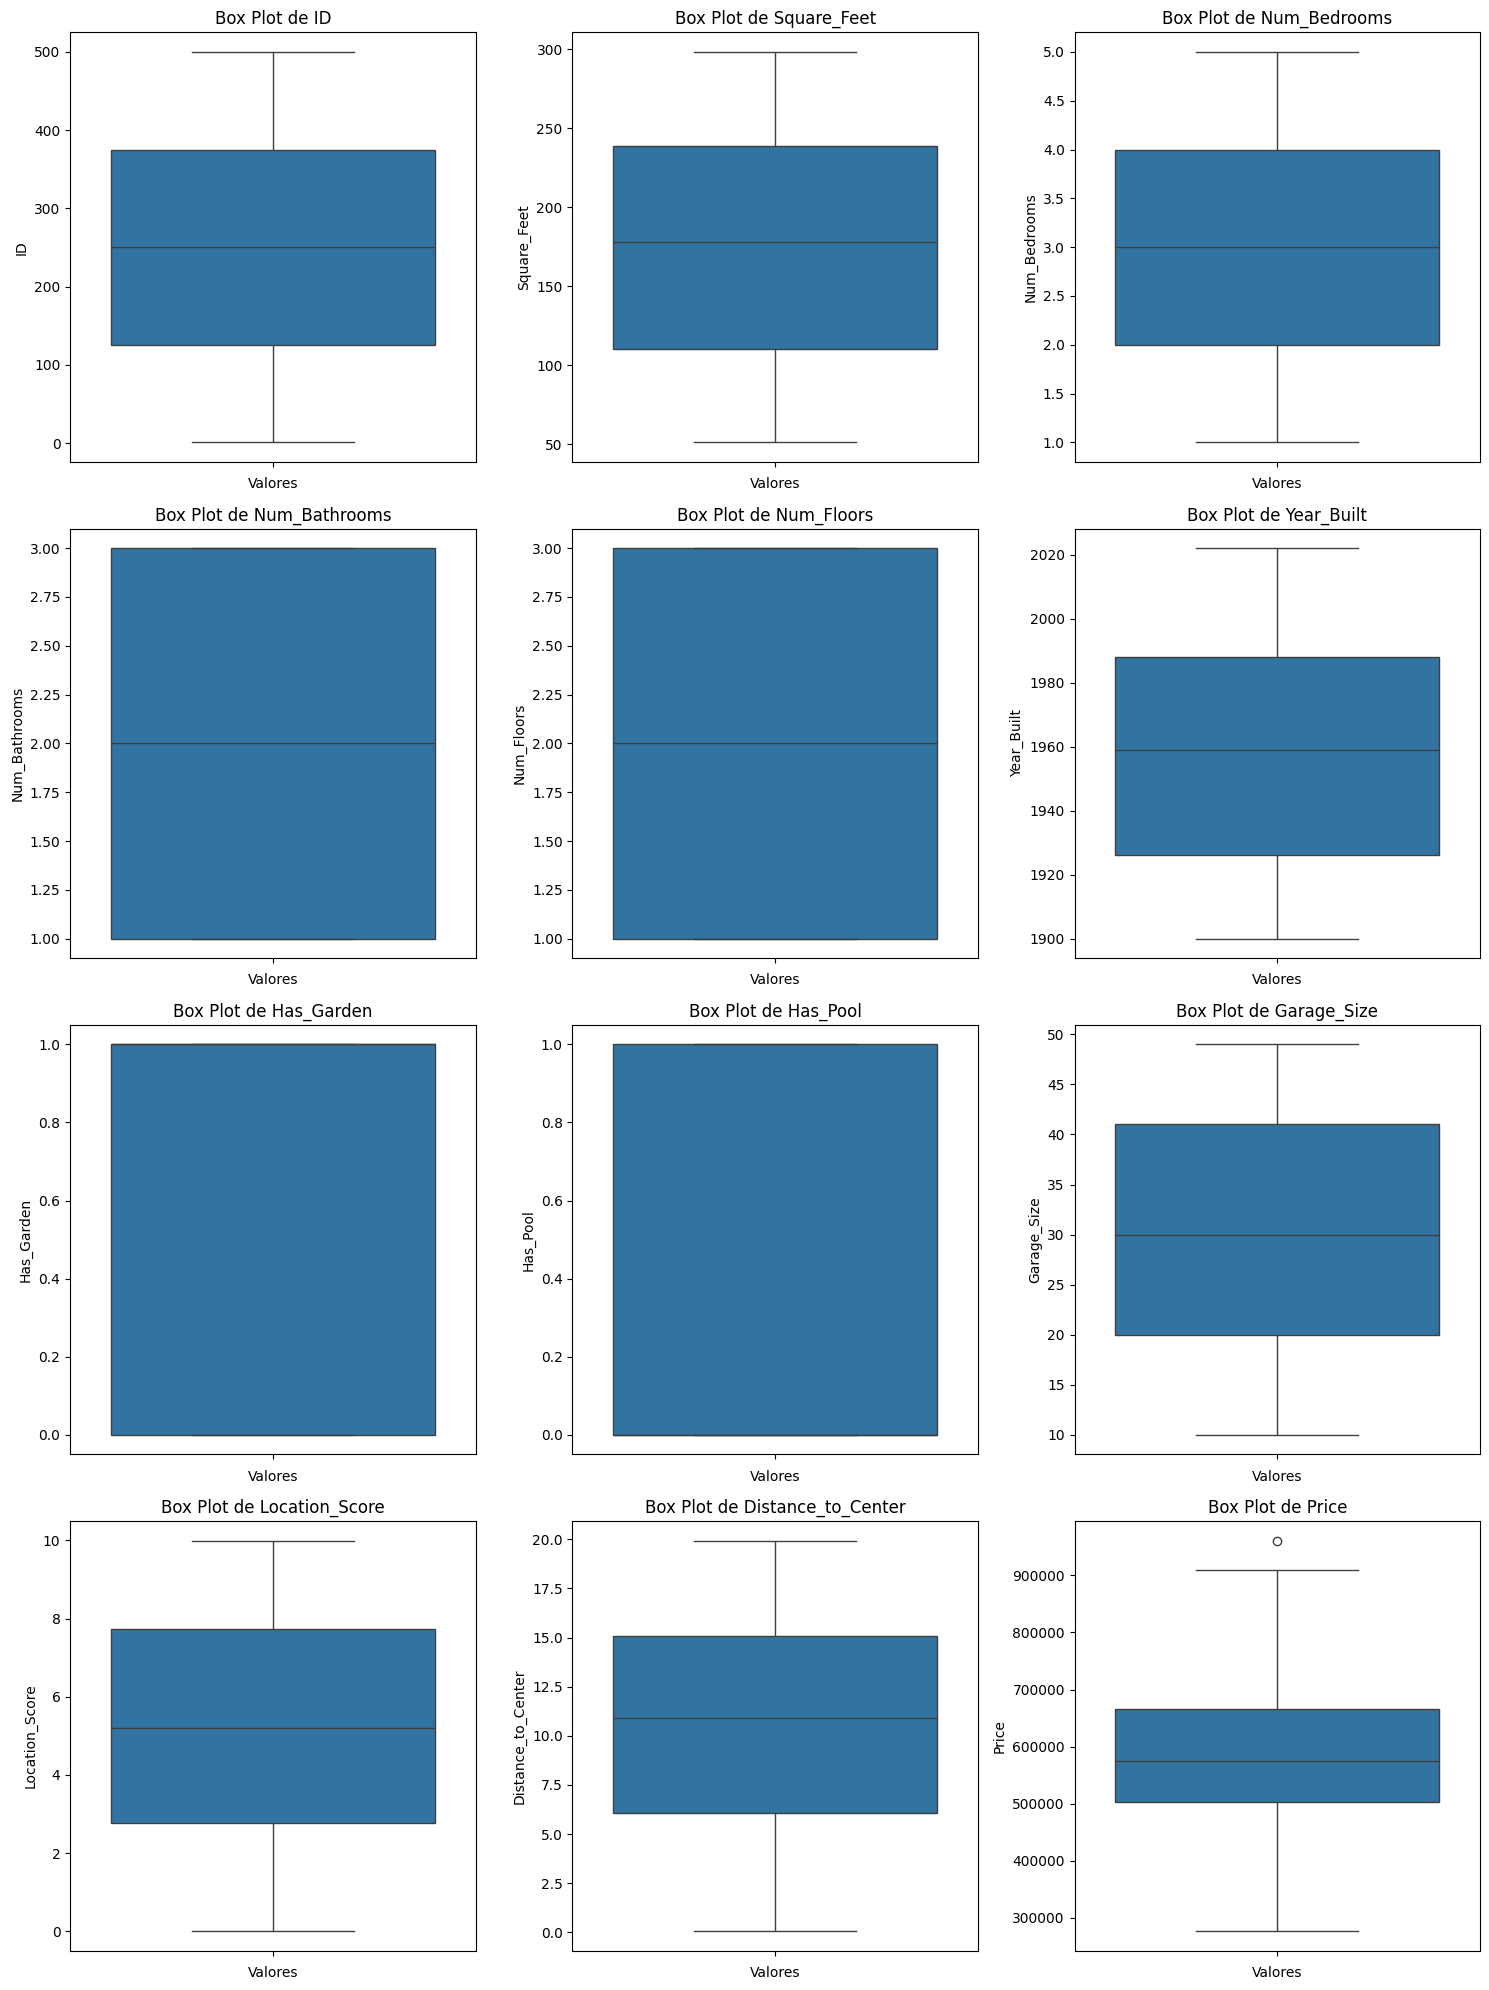

In [ ]:
# Dividindo o box plot em pequenos gráficos múltiplos
num_vars = len(dataset.columns)
num_cols = 3  # Número de colunas para os subplots
num_rows = (num_vars + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Plotando cada variável em um subplot separado
for i, var in enumerate(dataset.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(y=dataset[var], ax=ax)
    ax.set_title(f'Box Plot de {var}')
    ax.set_xlabel('Valores')
    ax.set_ylabel(var)

# Removendo subplots vazios
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()



É possivel pbservar que apenas no boxplot do preço possuimos outliers e que a mediana está delocada para baixo indicando assimetria dos dados.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricopodem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Adicionando Feature Engineering
# Identificar variáveis com maior correlação
correlation_matrix = dataset.corr()
print(correlation_matrix)

                          ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  \
ID                  1.000000     0.051102      0.014511       0.027395   
Square_Feet         0.051102     1.000000     -0.049918      -0.001667   
Num_Bedrooms        0.014511    -0.049918      1.000000      -0.056808   
Num_Bathrooms       0.027395    -0.001667     -0.056808       1.000000   
Num_Floors         -0.006343     0.056873      0.009088      -0.040895   
Year_Built          0.028548    -0.055062      0.031806      -0.013407   
Has_Garden         -0.005307    -0.000978      0.017429      -0.037040   
Has_Pool           -0.076580     0.007530      0.012039      -0.024880   
Garage_Size        -0.000137    -0.051598     -0.065481       0.055707   
Location_Score     -0.045071    -0.035270     -0.000357      -0.013855   
Distance_to_Center -0.006751     0.093080      0.040511      -0.082571   
Price               0.031774     0.558604      0.563973       0.156689   

                    Num_Floors  Year_

Para visualizar melhor a diferença das correlações vamos plotar um gráfico de barras.

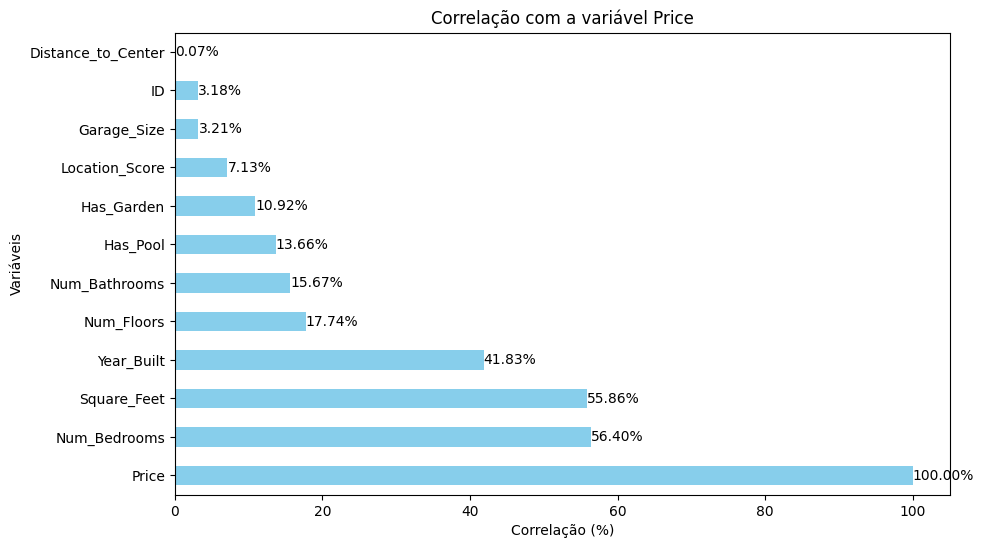

In [ ]:

# Multiplicando por 100 os valores da coluna 'Price'
correlation_matrix['Price'] = correlation_matrix['Price'] * 100

# Plotando um gráfico de barras da coluna 'Price' da matriz de correlação com rótulos nas barras horizontais
plt.figure(figsize=(10, 6))
ax = correlation_matrix['Price'].sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Correlação com a variável Price')
plt.xlabel('Correlação (%)')
plt.ylabel('Variáveis')

# Adicionando rótulos às barras em porcentagem
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge')

plt.show()




A partir do gráfico de Correlação é possivel observar que os valores de maior correlação positiva são de àrea do terreno(Square Fit) e os de número de quartos(Num_Bedrooms).

Agora iremos selecionar a duas variáveis de maior correlação.


In [ ]:
# Selecionar duas variáveis com maior correlação positiva
highest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
highest_corr = highest_corr[highest_corr < 1].idxmax()
print(f'A Maior correlação positiva ocorre entre: {highest_corr[0]} e {highest_corr[1]}')

A Maior correlação positiva ocorre entre: Num_Bedrooms e Price


Ou seja quanto mais quartos maior será o valor do Imóvel.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Vamos criar uma nova feature(combined_feature) multiplicando as duas variáveis de maior correlação e em seguida será plotado no gráfico de dispersão para a nova feature contra a variável alvo.

   combined_feature
0      6.021348e+05
1      5.914251e+05
2      4.644787e+05
3      2.915528e+06
4      2.479517e+06


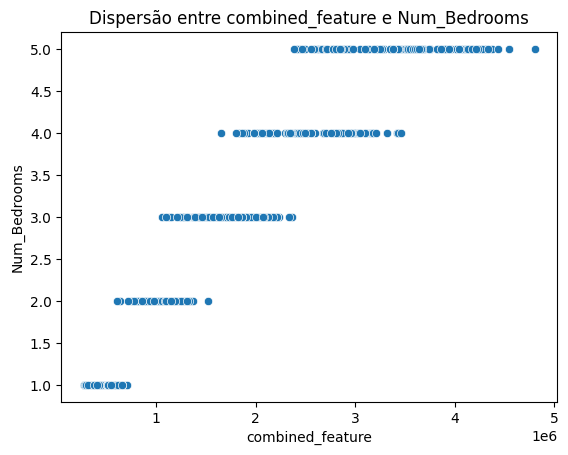

In [ ]:
# Criar nova feature baseada nessas variáveis
dataset['combined_feature'] = dataset[highest_corr[1]] * dataset[highest_corr[0]]
print(dataset[['combined_feature']].head())

# Plotar nova feature contra a variável alvo
sns.scatterplot(x=dataset['combined_feature'], y=dataset[highest_corr[0]])
plt.title(f'Dispersão entre combined_feature e {highest_corr[0]}')
plt.xlabel('combined_feature')
plt.ylabel(highest_corr[0])
plt.show()



*Os* dados foram separados em 20% treino para teste e 80% parateste.

In [ ]:
# Dividir os dados em conjuntos de treino e teste
# Separação em conjuntos de treino e teste
X = dataset[['combined_feature']]
y = dataset[highest_corr[1]]
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (400, 1)
Dimensões de X_test: (100, 1)
Dimensões de y_train: (400,)
Dimensões de y_test: (100,)


# Conclusão

A análise e pré-processamento do dataset demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset possuem uma grande quantidade de atributos que permitem aumentar a acuracidade dos resultados obtidos pelo Modelo de Machine Learning.

É possivel observar que os dados são limpos e variados reduzindo a probabilidade de erro do Modelo.

Validação das Hipoteses

O preço de uma habitação tem está diretamente relacionado a uma variavel? Ou mais de uma?
Duas variaveis possuem grande correlação com o preço, que são o número de quartos e tamanho da casa.

Existe alguma correlação entre Preço maior e presença de piscina na casa?
Correlação muito baixa para considerar no modelo.

As casas de menores preços são as que possuem menos quartos?
Sim, a correlaçao é alta para quantidade de quartos

As casas com mais banheiros são as mais caras?
Não, a correlação é baixa.